## Linear Regression 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100,1) # returns samples from U[0,1] in 1 dimension
y = 4 + 3 * X + np.random.randn(100,1) # returns samples from std Normal distn in 1 dimension
# y[:10] # numpy array has no head() attribute
plt.plot(X, y, ".")
plt.xlim(0,2)
plt.ylim(0,15)

In [ ]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance for the intercept term
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # the Normal equation theta_hat = (XTX)^-1 XT y
theta_0, theta_1 = theta_best 

In [ ]:
# Now we can make predictions
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict # when x = 0, y = 4 and when x = 2, y = 10

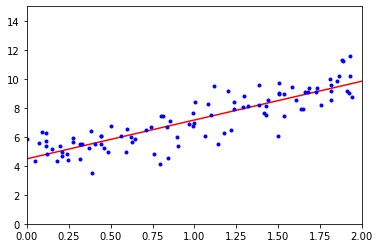

In [25]:
# Now lets draw the prediction
plt.plot(X_new, y_predict, "r-") # draw with red line
plt.plot(X, y, "b.") # blue dots
plt.axis([0,2,0,15])
plt.show()

In [29]:
# Can do the same thing using sklearn.linear_model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[4.48479437],
       [9.83426129]])

In [31]:
theta_hat2 = np.linalg.pinv(X_b).dot(y)
# This function uses pseudoinverse of X(Moore-Penrose inverse)
# The pseudoinverse uses Singular Value Decomposition(SVD) that decomposes the training set matrix X into 
# the matrix multiplication of three matrices. Then the pseudoinverse is computed using them
# This approach is more efficient than the Normal equation.

## Gradient descent
* The idea is to tweak parameters iteratively in order to minimize a cost function.
* Learning rate should not be too big or too small.
* Should ensure that all features have a similar scale(by feature scaling) or else it will take much longer to converge.
  
### Batch gradient descent
 * Calculates gradient over the full training set X at each gradient descent step. ==> slow but still faster than Normal equation or SVD

In [100]:
# Demonstration of the algorithm
eta = 0.1 # learning rate
n_iterations = 1000
m = 100 # number of instances

theta = np.random.randn(2,1) # random initialization
thetas_BGD_0,thetas_BGD_1 = list(), list() 

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # derivative of MSE(theta)
    theta = theta - eta * gradients
    thetas_BGD_0.append(theta.tolist()[0])
    thetas_BGD_1.append(theta.tolist()[1])

[[2.6199155736144926],
 [3.3182006464476004],
 [3.714851473115281],
 [3.9417031628666983],
 [4.072918557924926],
 [4.15021908404024],
 [4.197077384015713],
 [4.226700833428048],
 [4.246522359613809],
 [4.260726580451453]]

### Stochastic gradient descent
* Batch GD is too slow.
* Stochastic GD picks a random instance in X at every step and computes the gradients based only on that single instance. 
* Faster and memory efficient.
* However, the cost function would jump up and down, decrease only on average.
* Once it gets to the minimum, it will continue to bounce around, never settling down. ==> The final parameters are good, but not optimal
* This nature sometimes can help the algorithm jump out of local minima.
* One solution for this is to gradually reduce the learning rate. = simulated annealing.
* The function that determines the learning rate at each iteration = learning schedule


In [103]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameter

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization
thetas_SGD_0 = list()
thetas_SGD_1 = list()

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1] # selects an instance
        yi = y[random_index:random_index + 1] # selects an instance
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i) # the learning rate changes
        theta = theta - eta * gradients
        thetas_SGD_0.append(theta.tolist()[0])
        thetas_SGD_1.append(theta.tolist()[1])

In [69]:
# Can do the same thing using SGDRegressor in sklearn.linear_model
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-3, penalty = None, eta0=0.1) # tol = stopping point, penalty = regularization term. default = L2(ridge)
sgd_reg.fit(X, y.ravel()) # ravel() returns flattened array (shows the array in sideways)
sgd_reg.intercept_, sgd_reg.coef_

(array([4.51726615]), array([2.70983497]))

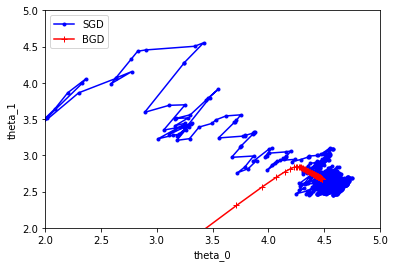

In [102]:
# Comparison plot
thetas_BGD_0 = np.array(thetas_BGD_0)
thetas_BGD_1 = np.array(thetas_BGD_1)

thetas_SGD_0 = np.array(thetas_SGD_0)
thetas_SGD_1 = np.array(thetas_SGD_1)

plt.plot(thetas_SGD_0, thetas_SGD_1, 'r.-', label = "SGD")
plt.plot(thetas_BGD_0, thetas_BGD_1, 'b+-', label = "BGD")

plt.xlabel("theta_0")
plt.ylabel("theta_1")
plt.legend(loc="upper left")
plt.xlim(2,5)
plt.ylim(2,5)
plt.show()

### Mini-batch gradient descent
* Computes the gradients on small random sets of instances.
* Compared to SGD, you can get a performance boost from hardware optimization of matrix operations (especially when using GPUs)  
and it gets closer to the minima than SGD - but may be harder to escape from local minima